# Instructions
The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. 

I put all this here instead of providing you the dataset directly, so that you could learn something along the way :) 

The assignment is in the last cell.

In [1]:
!pip3 install seaborn

## This cell automatically downloads Capital Bikeshare data

In [2]:
import pandas as pd
bikes = pd.read_csv('../data/2016-Q1-Trips-History-Data.csv')
bikes.head()


,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered


In [3]:
# Placed the same script in a different cell to see what result this 
# code yields
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)
bikes.head()

# It looks like the same information but in a different format

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00


### Create a new column that represents the hour of the day 

In [4]:
# So, the hour of day is really concerning the starting timepoint of bikeshare uses
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))

### Aggregate to get a count per hour/minute of the day across all trips

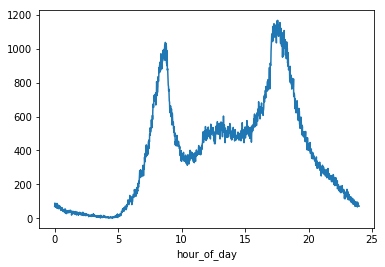

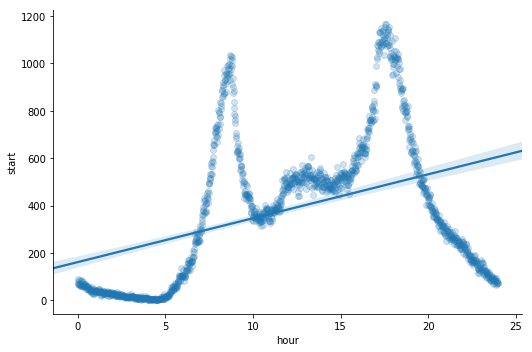

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Aggregating the column dimension, then indexing it
hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

# plotting the aggregate number 
hours.start.plot() 
sns.lmplot(x='hour', y='start', data=hours, aspect=1.5, scatter_kws={'alpha':0.2})

# Assignment 4
Using the **`hours`** dataframe and the `hour_of_day` column, perform the following cells. 

Explain the results in a **paragraph + charts** of  to describe which model you'd recommend


## 1. Create 3 models fit to `hour_of_day` with varying polynomial degrees 

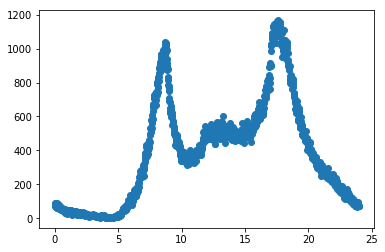

In [6]:
# I'm following along your Loss Function Comparison File
from sklearn import linear_model # adding additional module not already listed from above

# I prefer not using x and y as names
x_times = hours[['hour']]
y_starting = hours.start

plt.scatter(x_times, y_starting)

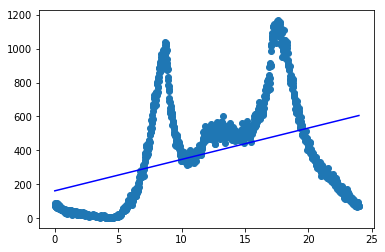

In [7]:
# For my reference - Setting up regular linear regresssion
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_times, y_starting)

# Plotting
plt.scatter(x_times, y_starting)
plt.plot(x_times, x_times*linear.coef_ + linear.intercept_, c = "b" )

In [8]:
# Model 1, polynomial linear regression x25 degree
from sklearn.preprocessing import PolynomialFeatures

poly_25 = PolynomialFeatures(degree=25)
x_25 = poly_25.fit_transform(x_times) # got rid of .reshape
x_25

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.00000000e-02, 4.00000000e-04, ...,
        8.38860800e-40, 1.67772160e-41, 3.35544320e-43],
       [1.00000000e+00, 3.00000000e-02, 9.00000000e-04, ...,
        9.41431788e-36, 2.82429536e-37, 8.47288609e-39],
       ...,
       [1.00000000e+00, 2.39500000e+01, 5.73602500e+02, ...,
        5.29696262e+31, 1.26862255e+33, 3.03835100e+34],
       [1.00000000e+00, 2.39700000e+01, 5.74560900e+02, ...,
        5.39963971e+31, 1.29429364e+33, 3.10242185e+34],
       [1.00000000e+00, 2.39800000e+01, 5.75040400e+02, ...,
        5.45168949e+31, 1.30731514e+33, 3.13494170e+34]])

In [9]:
linear = linear_model.LinearRegression()
linear.fit(x_25, y_starting)
linear.coef_, linear.intercept_

# So far just copy and pasting

(array([-4.70053389e-21,  4.25577597e-19,  2.86340819e-22, -2.87151676e-25,
         1.52942891e-27,  2.27110474e-30,  2.04295496e-30,  2.37799436e-29,
         2.78276140e-28,  3.21951564e-27,  3.65473938e-26,  4.03725517e-25,
         4.29819285e-24,  4.35744774e-23,  4.14022223e-22,  3.60547568e-21,
         2.78224971e-20,  1.79851813e-19,  8.73208023e-19,  2.38526543e-18,
        -5.17154209e-19,  4.14076916e-20, -1.45700494e-21,  1.47044652e-23,
         3.45890175e-25, -7.07597579e-27]), 273.72942946950593)

In [10]:
ridge = linear_model.Ridge()
ridge.fit(x_25, y_starting)
ridge.coef_, ridge.intercept_

(array([-9.82678123e-18,  2.38239504e-16,  1.41333181e-16,  2.66195958e-16,
         6.35468615e-17, -4.56806931e-17,  5.84980919e-18,  2.96815590e-18,
        -4.81236845e-17,  5.85990452e-17,  8.27015192e-17,  8.41027834e-17,
         1.07612985e-16,  1.25774171e-16, -5.43810832e-17, -1.01639415e-16,
        -1.38116955e-18,  3.12792320e-17, -1.23109784e-16,  3.78594551e-17,
        -4.94899947e-18,  3.47754823e-19, -1.40282240e-20,  3.19538425e-22,
        -3.67705795e-24,  1.50466242e-26]), 275.45907916227975)

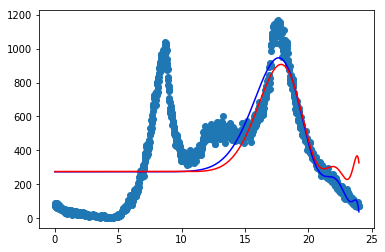

In [11]:
# Model 1 : 25 
import numpy as np # I didn't need to until now

plt.scatter(x_times, y_starting)
plt.plot(x_times, np.dot(x_25, linear.coef_) + linear.intercept_, c='b')
plt.plot(x_times, np.dot(x_25, ridge.coef_) + ridge.intercept_, c='r')

In [12]:
# Okay.... I wasn't expecting that, but THAT IS COOL!
# I will be using this for work most likely


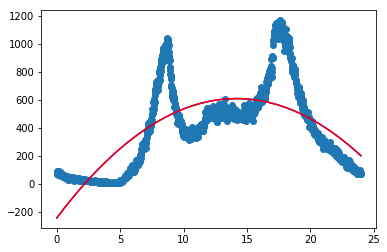

In [13]:
# Model 2, polynomial linear regression x2 degree
# More concise this time.
poly_2 = PolynomialFeatures(degree=2)
x_2 = poly_2.fit_transform(x_times) # got rid of .reshape
linear.fit(x_2, y_starting)
ridge.fit(x_2, y_starting)

plt.scatter(x_times, y_starting)
plt.plot(x_times, np.dot(x_2, linear.coef_) + linear.intercept_, c='b')
plt.plot(x_times, np.dot(x_2, ridge.coef_) + ridge.intercept_, c='r')

/Users/dell/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.474511e-35
  overwrite_a=True).T


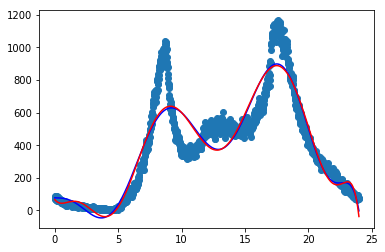

In [14]:
# Model 3, polynomial linear regression x12 degree
poly_12 = PolynomialFeatures(degree=12)
x_12 = poly_12.fit_transform(x_times) # got rid of .reshape
linear.fit(x_12, y_starting)
ridge.fit(x_12, y_starting)

plt.scatter(x_times, y_starting)
plt.plot(x_times, np.dot(x_12, linear.coef_) + linear.intercept_, c='b')
plt.plot(x_times, np.dot(x_12, ridge.coef_) + ridge.intercept_, c='r')

In [15]:
# I want to see what will happen if I added more data points like you 
# had in the Loss Function Comparison file. But, adding more fake data 
# points here would not have the same meaning. While we've already known 
# how the scatterplot will look in the Loss Function Comparison file, 
# adding more points after 24 hours doesn't make sense. That'll be
# like breaking the law of physics or going against social conventions of
# measuring time.

# In Model 1, it appears that the linear method appears to follow
# along the datapoints at the x=24 mark while the ridge method "refuses"
# to fall down the slope. This is a good thing. I will explain in a sec.
# In the second and third model, both linear and ridge lines are traveling
# more-or-less the same trajectory.

# In determining which model would be the best recommendation, I have 
# been thinking about the context of the graphs. For example, although I 
# really like how the third model glides along the spiked datapoints,
# the predictive direction appears to takeabout a dramatic end. And, 
# the question I should be asking at this point is - what does this mean
# in the context of the graph drawn?

# After 24 hours, the clock will circle back to 0. We already know the 
# value of y at x = 0. So, I conclude that Model 3 is not a good for
# prediction. I don't think Medel 2 really gives us any useful information
# other than to reflect 

# Finally, we are left with Model 1, where the ridge method, as mentioned
# above, "refuses" to fall down the spike. This gives me some glimps
# of hope more than the other two models. Therefore, among the three
# models, I would recommend Model 1.

## 2. Choose one of the polynomial models and create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values


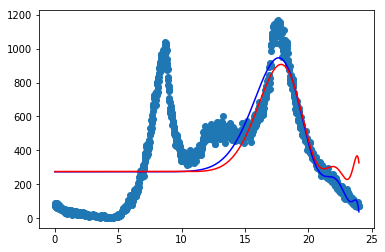

In [16]:
# Model 1, polynomial linear regression x25 degree + alpha = .1
linear.fit(x_25, y_starting)
ridge1 = linear_model.Ridge(alpha = .1)
ridge1.fit(x_25, y_starting)

plt.scatter(x_times, y_starting)
plt.plot(x_times, np.dot(x_25, linear.coef_) + linear.intercept_, c='b')
plt.plot(x_times, np.dot(x_25, ridge1.coef_) + ridge1.intercept_, c='r')

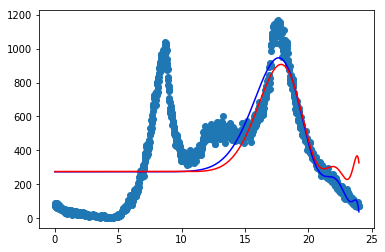

In [17]:
# Model 2, polynomial linear regression x25 degree + alpha = .5
linear.fit(x_25, y_starting)
ridge2 = linear_model.Ridge(alpha = .5)
ridge2.fit(x_25, y_starting)

plt.scatter(x_times, y_starting)
plt.plot(x_times, np.dot(x_25, linear.coef_) + linear.intercept_, c='b')
plt.plot(x_times, np.dot(x_25, ridge2.coef_) + ridge2.intercept_, c='r')

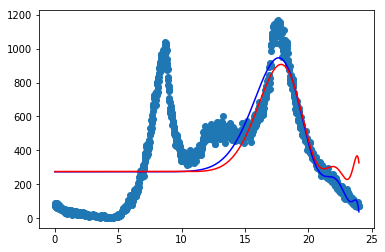

In [18]:
# Model 3, polynomial linear regression x25 degree + alpha = 20
linear.fit(x_25, y_starting)
ridge3 = linear_model.Ridge(alpha = 20)
ridge3.fit(x_25, y_starting)

plt.scatter(x_times, y_starting)
plt.plot(x_times, np.dot(x_25, linear.coef_) + linear.intercept_, c='b')
plt.plot(x_times, np.dot(x_25, ridge3.coef_) + ridge3.intercept_, c='r')

In [19]:
# Changing the alpha values do not appear to induce any change
# to graph illustrations. So, I wanted to find out if the values were 
# infact changing when alphas changed

# Checking to see if this compare method would work to test alphas
from IPython.display import display
same_A = 1
same_B = 1
display(same_A is same_B)

diff_A = 1
diff_B = 2
display(diff_A is diff_B)

True

False

In [20]:
# Above method worked, so I'm going to use it to test alphas

# Control
ridge_pointOne = linear_model.Ridge(alpha=.1)
ridge_A = ridge_pointOne.fit(x_25, y_starting)
ridge_B = ridge_pointOne.fit(x_25, y_starting)
display(ridge_A is ridge_B)

# Different alphas
ridge1 = linear_model.Ridge(alpha=.1)
ridge2 = linear_model.Ridge(alpha=.5)
ridge3 = linear_model.Ridge(alpha=20)

ridge_1 = ridge1.fit(x_25, y_starting)
ridge_2 = ridge2.fit(x_25, y_starting)
ridge_3 = ridge3.fit(x_25, y_starting)

display(ridge_1 is ridge_2)
display(ridge_1 is ridge_3)
display(ridge_2 is ridge_3)

True

False

False

False

In [21]:
# I'm wondering if I've done something wrong. But, I'm still
# learning and should report my findings regardless the oddity.